# Assignment 2: Reinforcement Learning

**Name**: Zihan Chen  
**zID**: 55274987

## Description

This notebook implements and compares two reinforcement learning algorithms—Q-learning and SARSA—within a static grid world environment. The notebook is organised into four main sections:

- **Task 1**: Implementation and evaluation of the Q-learning algorithm.
- **Task 2**: Implementation and evaluation of the SARSA algorithm.
- **Task 3**: Interactive reinforcement learning using a Q-learning teacher to guide a Q-learning student.
- **Task 4**: Interactive reinforcement learning using a SARSA teacher to guide a SARSA student.

Each section includes the algorithm, training process, evaluation metrics, and required visualisations such as learning curves and performance heatmaps. Final discussion and analysis are included to assess the impact of teacher guidance on learning outcomes.

In [2]:
# Parameter settings and pre-functions
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from env import GridWorldEnv

# Hyperparameters
alpha = 0.3
gamma = 0.95
epsilon_start = 1.0
epsilon_end = 0.1
epsilon_decay = 0.995
num_episodes = 500
max_steps = 100

# epsilon-greedy action
def epsilon_greedy(Q, pos, eps):
    if np.random.rand() < eps:         # agent choose explore
        return np.random.choice(4)         # randomly choose 4 direction
    return np.argmax(Q[pos[0], pos[1]])     # choose max Q action

# moving window
def moving_window(data, window=50):
    return np.convolve(data, np.ones(window) / window, mode='valid')     # avg sequence in every window

# reward of each episodes
def reward_of_episodes(rewards, title):
    plt.figure(figsize=(10, 5))
    plt.plot(rewards, alpha=0.3, label="Episode Rewards")
    plt.plot(moving_window(rewards), color='blue', label="50-episode MA")
    plt.axhline(y=0, color='red', linestyle='--', label="Break-even")
    plt.xlim(left=0)
    plt.title(title)
    plt.xlabel("Episode")
    plt.ylabel("Reward Episode")
    plt.legend()
    plt.grid(True)
    plt.show()

# compute the metrics
def compute_metrics(rewards, steps, successes):
    avg_reward = np.mean(rewards)
    success_rate = (np.sum(successes) / len(successes)) * 100
    avg_learning_speed = np.mean(steps)
    return avg_reward, success_rate, avg_learning_speed


pygame 2.6.1 (SDL 2.28.4, Python 3.12.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


# Task 1  Q-learning Implementation

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5322.59it/s]


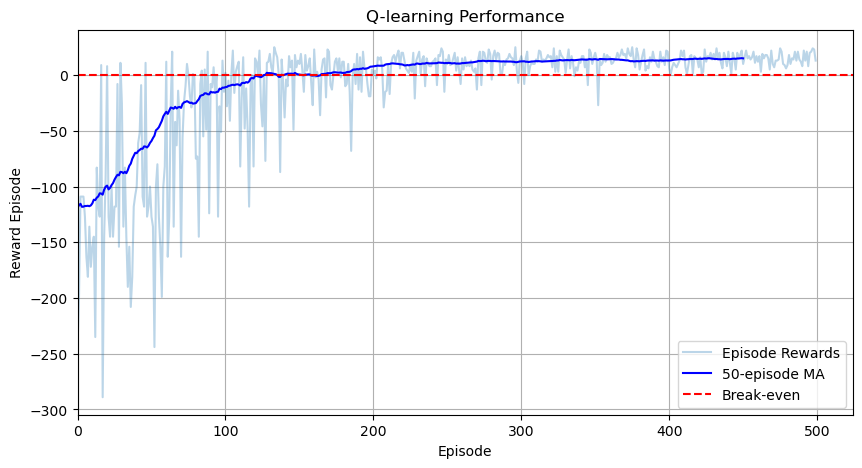

Q-learning Results:
  Average Reward: -11.52
  Success Rate: 89.60%
  Average Learning Speed (Steps): 27.72


In [3]:
# train Q learning
def q_learning():
    env = GridWorldEnv(seed=42)    # initial 11x11 grid environment
    Q = np.zeros((11, 11, 4))      # initial Q table, 4 statement
    rewards, steps, successes = [], [], []
    eps = epsilon_start        # inital epsilon

    # train
    for episode in tqdm(range(num_episodes)):
        pos = env.reset()       # randomly initial the start position
        sum_reward = 0          # sum reward of current episode

        for step in range(max_steps):
            action = epsilon_greedy(Q, pos, eps)          # choose action by epsilon_greedy
            new_state, reward, done, _ = env.step(action)       # do the action, get new state and reward
            best_next = np.argmax(Q[new_state[0], new_state[1]])         # best action of next state
            
            # update Q value
            Q[pos[0], pos[1], action] += alpha * (reward + gamma * Q[new_state[0], new_state[1], best_next] - Q[pos[0], pos[1], action])
            pos = new_state             # update new state
            sum_reward += reward        # add the reward of this step
            if done:
                break            # stop when arrived destination

        eps = max(epsilon_end, eps * epsilon_decay)      # exponential decay epsilson
        rewards.append(sum_reward)          # save the sum of reward
        steps.append(step + 1)              # save the num of step
        successes.append(pos == env.goal)   # arrived destination or not 

    return Q, rewards, steps, successes

# execution
q_table, q_rewards, q_steps, q_success = q_learning()
reward_of_episodes(q_rewards, "Q-learning Performance")
q_avg_reward, q_success_rate, q_avg_speed = compute_metrics(q_rewards, q_steps, q_success)

# output metrics
print("Q-learning Results:")
print(f"  Average Reward: {q_avg_reward:.2f}")
print(f"  Success Rate: {q_success_rate:.2f}%")
print(f"  Average Learning Speed (Steps): {q_avg_speed:.2f}")


# Task 2  SARSA Implementation

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5737.64it/s]


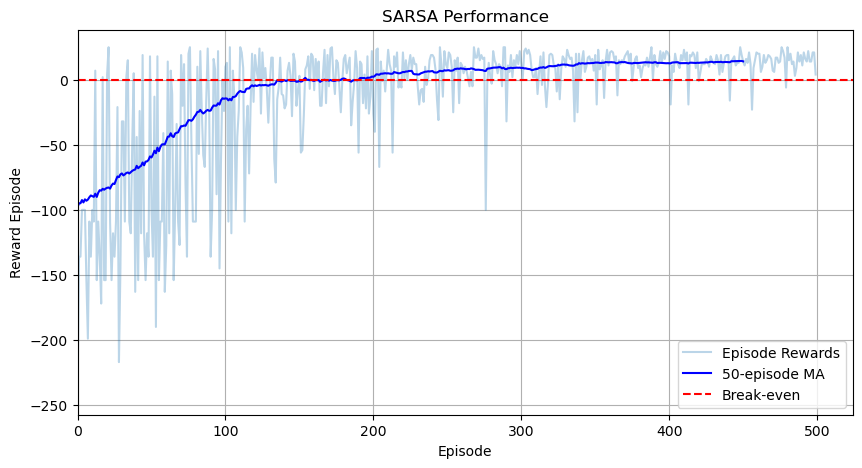

SARSA Results:
  Average Reward: -11.42
  Success Rate: 88.00%
  Average Learning Speed (Steps): 29.47


In [4]:
# train sarsa
def sarsa():
    env = GridWorldEnv(seed=42)    # initial 11x11 grid environment
    Q = np.zeros((11, 11, 4))      # initial Q table, 4 statement
    rewards, steps, successes = [], [], []
    eps = epsilon_start        # inital epsilon

    # train
    for episode in tqdm(range(num_episodes)):
        pos = env.reset()       # randomly initial the start position
        sum_reward = 0          # sum reward of current episode
        
        action = epsilon_greedy(Q, pos, eps)        # choose first action by epsilon_greedy

        for step in range(max_steps):
            new_state, reward, done, _ = env.step(action)      # do the action, get new state and reward
            next_action = epsilon_greedy(Q, new_state, eps)    # best action of next state

            # update Q value
            Q[pos[0], pos[1], action] += alpha * (reward + gamma * Q[new_state[0], new_state[1], next_action] - Q[pos[0], pos[1], action])
            pos = new_state             # update new state
            action = next_action        # update action
            sum_reward += reward        # add the reward of this step
            if done:
                break            # stop when arrived destination

        eps = max(epsilon_end, eps * epsilon_decay)       # decay epsilson
        rewards.append(sum_reward)          # save the sum of reward
        steps.append(step + 1)              # save the num of step
        successes.append(pos == env.goal)   # arrived destination or not 

    return Q, rewards, steps, successes

# execution
sarsa_table, sarsa_rewards, sarsa_steps, sarsa_success = sarsa()
reward_of_episodes(sarsa_rewards, "SARSA Performance")
sarsa_avg_reward, sarsa_success_rate, sarsa_avg_speed = compute_metrics(sarsa_rewards, sarsa_steps, sarsa_success)

# ouput metrics
print("SARSA Results:")
print(f"  Average Reward: {sarsa_avg_reward:.2f}")
print(f"  Success Rate: {sarsa_success_rate:.2f}%")
print(f"  Average Learning Speed (Steps): {sarsa_avg_speed:.2f}")


# Baseline Comparison 

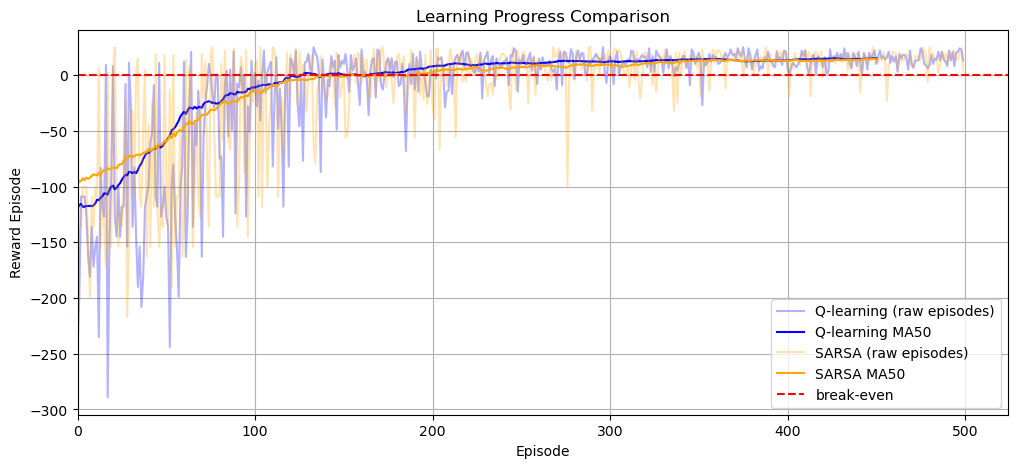

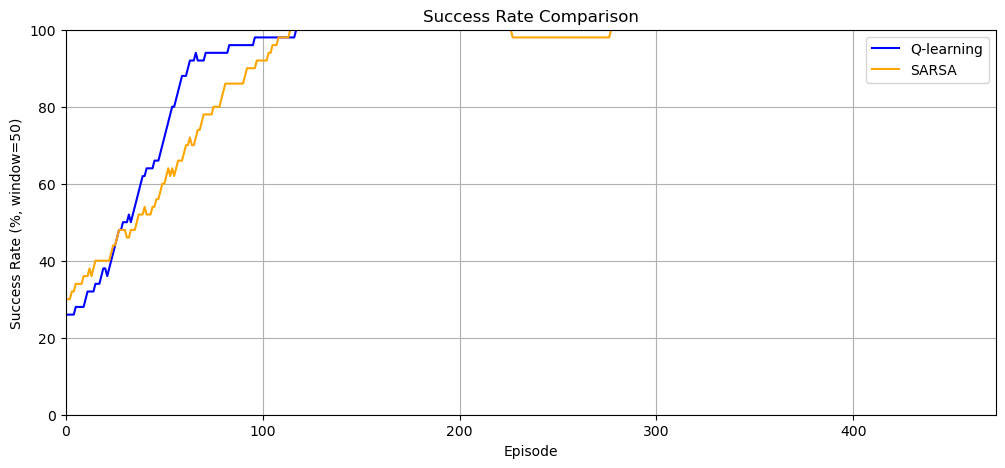

In [5]:
#  Learning Progress Comparison
plt.figure(figsize=(12, 5))
plt.plot(q_rewards, alpha=0.3, label="Q-learning (raw episodes)", color='blue')
plt.plot(moving_window(q_rewards), label="Q-learning MA50", color='blue')
plt.plot(sarsa_rewards, alpha=0.3, label="SARSA (raw episodes)", color='orange')
plt.plot(moving_window(sarsa_rewards), label="SARSA MA50", color='orange')
plt.axhline(y=0, color='red', linestyle='--', label="break-even")
plt.xlim(left=0)
plt.title("Learning Progress Comparison")
plt.xlabel("Episode")
plt.ylabel("Reward Episode")
plt.legend()
plt.grid(True)
plt.show()

# Success Rate Comparison
def success_rate(successes, window=50):
    return np.convolve(successes, np.ones(window) / window, mode='valid') * 100

plt.figure(figsize=(12, 5))
plt.plot(success_rate(q_success), label="Q-learning", color='blue')
plt.plot(success_rate(sarsa_success), label="SARSA", color='orange')
plt.xlim(left=0)
plt.ylim(0, 100)
plt.title("Success Rate Comparison")
plt.xlabel("Episode")
plt.ylabel("Success Rate (%, window=50)")
plt.legend()
plt.grid(True)
plt.show()


### Analysis
Q-learning shows faster convergence and higher early stability than SARSA. The former reaches positive returns in about 150 rounds, and the success rate exceeds 90% ini about 80 rounds, which is significantly earlier than SARSA. The learning process of SARSA is smoother but converges slower, with larger initial fluctuations. In the end, both can achieve a high success rate, but Q-learning has more advantages in training efficiency and strategy optimization speed. This is in line with theoretical expectations: Q-learning uses off-policy updates, which makes it easier to explore high-return paths, while SARSA's on-policy updates are more conservative.

# Task 3 Q-learning with Teacher

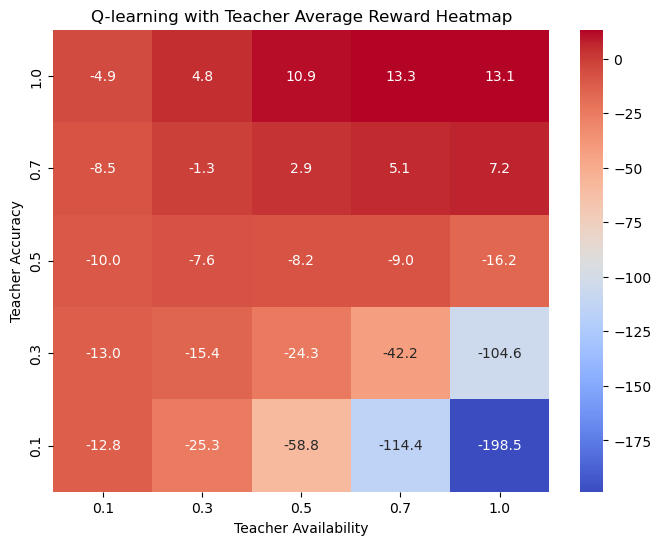

In [6]:
# train Q learning with teacher
def q_learning_teacher(Q_table, ava_list, acc_list):
    results = []           # to save all metrics
    all_reward = {}        # to save all reward

    # browse 25 teacher combinations
    for ava in ava_list:
        for acc in acc_list:
            env = GridWorldEnv(seed=42)      # initial 11x11 grid environment
            Q = np.zeros((11, 11, 4))        # initial Q table, 4 statement 
            eps = epsilon_start              # inital epsilon
            rewards, steps, successes = [], [], []

            for episode in range(num_episodes):
                pos = env.reset()      # randomly initial the start position
                sum_reward = 0         # sum reward of current episode

                for step in range(max_steps):
                    is_advice = np.random.rand() < ava             # whether teacher give adivc, depends on availability
                    if is_advice:
                        is_correct = np.random.rand() < acc        # whether the advice correct or not
                        best_action = np.argmax(Q_table[pos[0], pos[1]])          # best action of current state
                        
                        if is_correct:
                            action = best_action            # advice correct
                        else:
                            action = np.random.choice([a for a in range(4) if a != best_action])        # advice wrong
                    else:
                        action = epsilon_greedy(Q, pos, eps)             # no advice use epsilon_greedy

                    new_state, reward, done, _ = env.step(action)        # do the action, get new state and reward
                    best_next = np.argmax(Q[new_state[0], new_state[1]])
                    
                    # update Q value
                    Q[pos[0], pos[1], action] += alpha * (reward + gamma * Q[new_state[0], new_state[1], best_next] - Q[pos[0], pos[1], action])
                    pos = new_state             # update new state
                    sum_reward += reward        # add the reward of this step
                    if done:
                        break        # stop when arrived destination

                eps = max(epsilon_end, eps * epsilon_decay)       # decay epsilson
                rewards.append(sum_reward)          # save the sum of reward
                steps.append(step + 1)              # save the num of step
                successes.append(pos == env.goal)   # arrived destination or not 

            # store the metric of current result
            avg_reward = np.mean(rewards)
            success_rate = np.mean(successes) * 100
            avg_speed = np.mean(steps)
            all_reward[(ava, acc)] = rewards
            results.append({
                "availability": ava,
                "accuracy": acc,
                "avg_reward": avg_reward,
                "success_rate": success_rate,
                "avg_speed": avg_speed
            })
    return results, all_reward

# Average Reward Heatmap
def q_teacher_heatmap(results):
    heatmap = np.zeros((5, 5))
    acc_sorted = sorted(set(r['accuracy'] for r in results))
    ava_sorted = sorted(set(r['availability'] for r in results))
    
    for r in results:
        i = acc_sorted.index(r['accuracy'])
        j = ava_sorted.index(r['availability'])
        heatmap[i][j] = r['avg_reward']

    # reverse
    heatmap = heatmap[::-1]
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap, annot=True, xticklabels=ava_sorted, yticklabels=acc_sorted[::-1], cmap='coolwarm', fmt='.1f')
    plt.xlabel("Teacher Availability")
    plt.ylabel("Teacher Accuracy")
    plt.title("Q-learning with Teacher Average Reward Heatmap")
    plt.show()

# execution
ava_list = [0.1, 0.3, 0.5, 0.7, 1.0]
acc_list = [0.1, 0.3, 0.5, 0.7, 1.0]
task3_results, q_rewards_result = q_learning_teacher(q_table, ava_list, acc_list)
q_teacher_heatmap(task3_results)



# Task 4 SARSA with Teacher

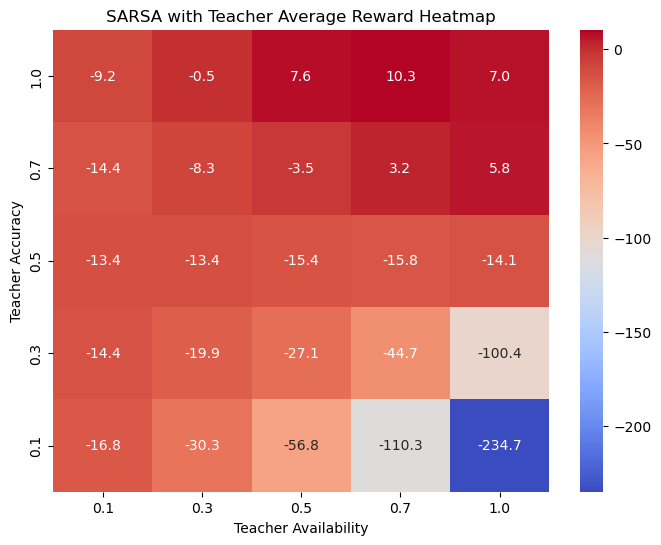

In [7]:
# train sarsa with teacher
def sarsa_teacher(Q_table, ava_list, acc_list):
    results = []           # to save all metrics
    all_reward = {}        # to save all reward

    # browse 25 teacher combinations 
    for ava in ava_list:
        for acc in acc_list:
            env = GridWorldEnv(seed=42)     # initial 11x11 grid environment
            Q = np.zeros((11, 11, 4))        # initial Q table, 4 statement 
            eps = epsilon_start              # inital epsilon
            rewards, steps, successes = [], [], []

            for episode in range(num_episodes):
                pos = env.reset()      # randomly initial the start position 
                sum_reward = 0
                action = epsilon_greedy(Q, pos, eps)       # sum reward of current episode

                for step in range(max_steps):
                    is_advice = np.random.rand() < ava             # whether teacher give adivc, depends on availability 
                    if is_advice:
                        is_correct = np.random.rand() < acc       # whether the advice correct or not
                        best_action = np.argmax(Q_table[pos[0], pos[1]])          # best action of current state 
                        action = best_action if is_correct else np.random.choice([a for a in range(4) if a != best_action])    # advice wrong

                    new_state, reward, done, _ = env.step(action)        # do the action, get new state and reward
                    next_action = epsilon_greedy(Q, new_state, eps)      # use epsilon_greedy in new state

                    # update Q value
                    Q[pos[0], pos[1], action] += alpha * (reward + gamma * Q[new_state[0], new_state[1], next_action] - Q[pos[0], pos[1], action])
                    pos = new_state             # update new state
                    action = next_action        # update action
                    sum_reward += reward        # add the reward of this step
                    if done:
                        break        # stop when arrived destination

                eps = max(epsilon_end, eps * epsilon_decay)       # decay epsilson
                rewards.append(sum_reward)          # save the sum of reward
                steps.append(step + 1)              # save the num of step
                successes.append(pos == env.goal)   # arrived destination or not

            # store the metric of current result
            avg_reward = np.mean(rewards)
            success_rate = np.mean(successes) * 100
            avg_speed = np.mean(steps)
            all_reward[(ava, acc)] = rewards
            results.append({
                "availability": ava,
                "accuracy": acc,
                "avg_reward": avg_reward,
                "success_rate": success_rate,
                "avg_speed": avg_speed
            })
    return results, all_reward

# Average Reward Heatmap
def sarsa_teacher_heatmap(results):
    heatmap = np.zeros((5, 5))
    acc_sorted = sorted(set(r['accuracy'] for r in results))
    ava_sorted = sorted(set(r['availability'] for r in results))
    for r in results:
        i = acc_sorted.index(r['accuracy'])
        j = ava_sorted.index(r['availability'])
        heatmap[i][j] = r['avg_reward']

    # reverse
    heatmap = heatmap[::-1]
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap, annot=True, fmt=".1f", xticklabels=ava_sorted, yticklabels=acc_sorted[::-1], cmap="coolwarm")
    plt.xlabel("Teacher Availability")
    plt.ylabel("Teacher Accuracy")
    plt.title("SARSA with Teacher Average Reward Heatmap")
    plt.show()

# execution
ava_list = [0.1, 0.3, 0.5, 0.7, 1.0]
acc_list = [0.1, 0.3, 0.5, 0.7, 1.0]
task4_results, sarsa_rewards_result  = sarsa_teacher(sarsa_table, ava_list, acc_list)
sarsa_teacher_heatmap(task4_results)


# Testing Code

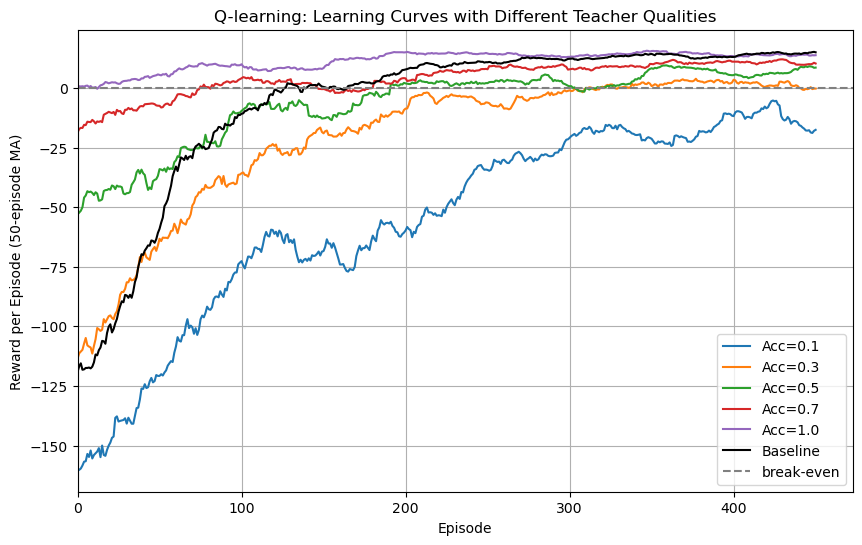

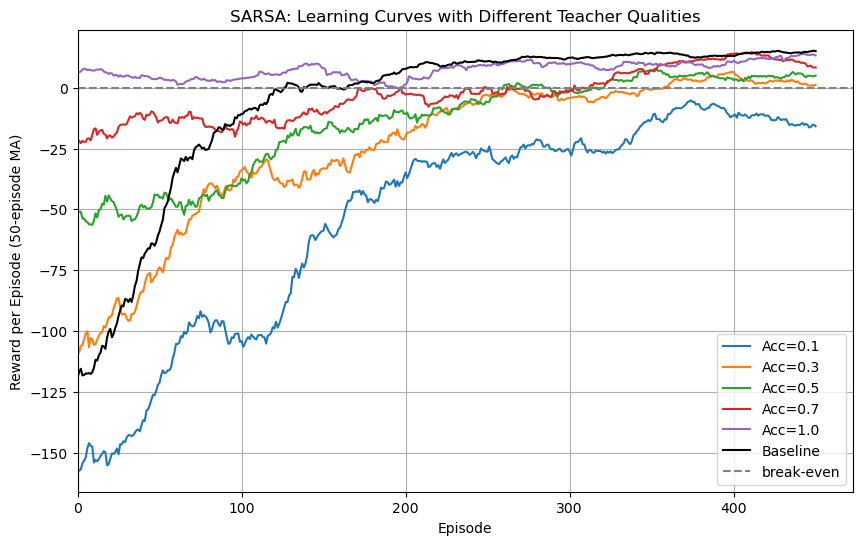

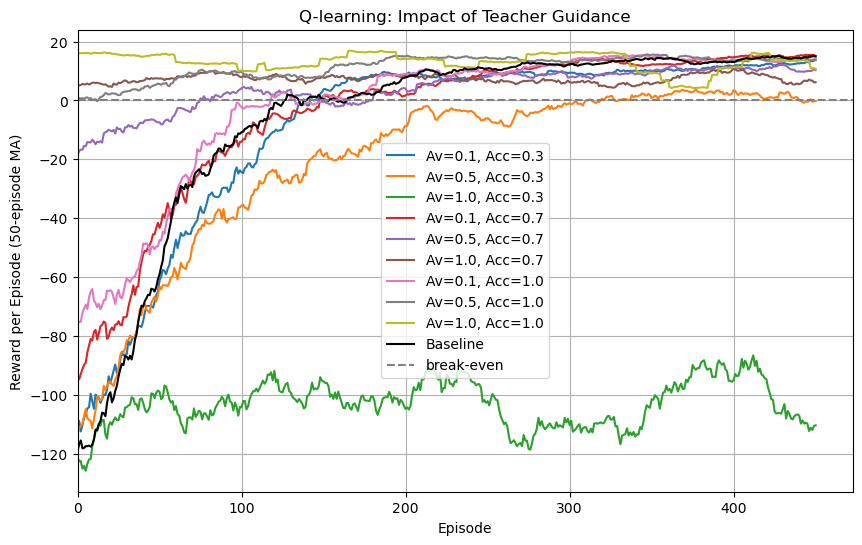

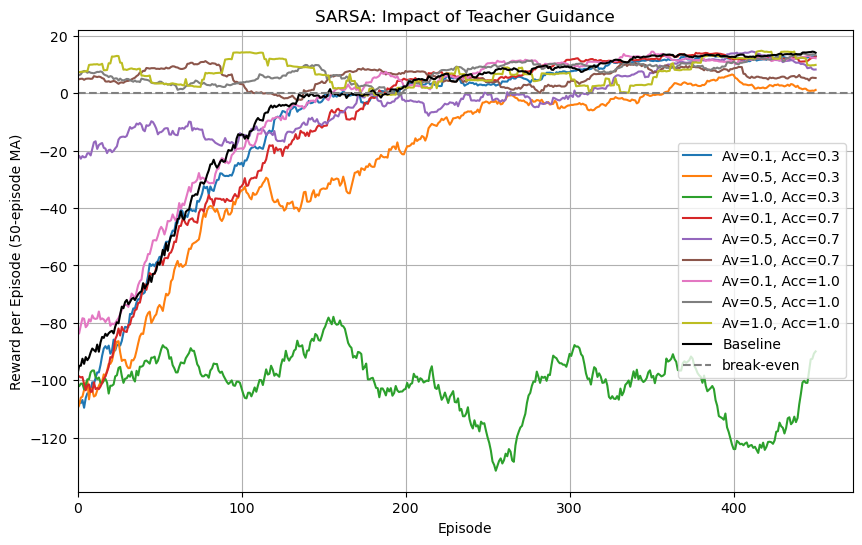

In [7]:
# Learning Curves with Different Teacher Qualities
def learning_curves(all_result, baseline_rewards, title, ava_level):
    plt.figure(figsize=(10, 6))
    for (ava, acc) in sorted(all_result.keys()):
        if ava == ava_level:
            rewards = all_result[(ava, acc)]
            plt.plot(moving_window(rewards), label=f"Acc={acc}")
            
    plt.plot(moving_window(baseline_rewards), color='black', label="Baseline")
    plt.axhline(y=0, color='grey', linestyle='--', label="break-even")
    plt.title(f"{title}: Learning Curves with Different Teacher Qualities")
    plt.xlim(left=0)
    plt.xlabel("Episode")
    plt.ylabel("Reward per Episode (50-episode MA)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Teacher Guidance Effectiveness Comparison
def guidance_effectiveness(all_teacher_rewards, baseline_rewards, title, acc_sorted=[0.3, 0.7, 1.0], ava_sorted=[0.1, 0.5, 1.0]):
    plt.figure(figsize=(10, 6))
    for acc in acc_sorted:
        for ava in ava_sorted:
            if (ava, acc) in all_teacher_rewards:
                plt.plot(moving_window(all_teacher_rewards[(ava, acc)]), label=f"Av={ava}, Acc={acc}")

    plt.plot(moving_window(baseline_rewards), color='black', label="Baseline")
    plt.axhline(y=0, color='grey', linestyle='--', label="break-even")
    plt.xlim(left=0)
    plt.title(f"{title}: Impact of Teacher Guidance")
    plt.xlabel("Episode")
    plt.ylabel("Reward per Episode (50-episode MA)")
    plt.legend()
    plt.grid(True)
    plt.show()

# plot images
learning_curves(q_rewards_result, q_rewards, "Q-learning", ava_level=0.5)
learning_curves(sarsa_rewards_result, q_rewards, "SARSA", ava_level=0.5)
guidance_effectiveness(q_rewards_result, q_rewards, "Q-learning")
guidance_effectiveness(sarsa_rewards_result, sarsa_rewards, "SARSA")


### Analysis
Teacher guidance has a significant impact on both Q-learning and SARSA. As the teacher's accuracy increases, the average rewards of the two algorithms gradually increase, especially when acc=1.0, where the performance is the best, significantly better than the baseline. At low accuracy(such as acc=0.1), the agent's learning effect is even dragged down, indicating that incorrect guidance may be counterproductive. Q-learning is more sensitive to the teacher's response and has a greater performace improvement, but it is also more susceptible to interference from incorrect teachers. In contrast, SARSA is more robust to low-precision teachers and performs more stably. Overall, teacher quality and availability play a decisive role in algorithm performace.